In [202]:
import numpy as np
import matplotlib.pyplot as plt

## Finite Differences First Derivative (Central Difference)
$$\frac{df}{dt} \approx \frac{f(t+\Delta t) - f(t-\Delta t)}{2 \Delta t}$$

In [203]:
def closedFirstGradient(f: np.array, t: np.array = None) -> np.array:
    if t is None:
        t = np.linspace(0,1,f.shape[1],endpoint=False)

    fPlusOne = np.roll( f, -1, axis=1 )
    fMinusOne = np.roll( f, 1, axis=1 )
    
    # Define the time step for every value of t
    h = np.roll(t, -1) - t
    h[-1] = h[0]

    num = fPlusOne - fMinusOne
    den = 2 * h
    grad = np.divide(num,den)

    return grad

## Finite Differences Second Derivative
$$\frac{d^2 f}{dt^2} \approx \frac{f(t+\Delta t) - 2f(t) + f(t - \Delta t)}{\Delta t^2}$$

In [204]:
def closedSecondGradient(f: np.array, t: np.array = None):
    if t is None:
        t = np.linspace(0,1,f.shape[1],endpoint=False)

    fPlusOne = np.roll( f, -1, axis=1 )
    fMinusOne = np.roll( f, 1, axis=1 )

    # Define the time step for every value of t
    h = np.roll(t, -1) - t
    h[-1] = h[0]

    num = fPlusOne - 2*f + fMinusOne
    den = np.power(h,2)
    grad = num/den

    return grad

## Simple Test

In [205]:
t = np.linspace(-np.pi,np.pi,1000,endpoint=False)
f = lambda t: [np.cos(t), np.sin(t), t*0]
df = lambda t: [-np.sin(t), np.cos(t), t*0]
d2f = lambda t: [-np.cos(t), -np.sin(t), t*0]

s = np.array( f(t) )
tds = np.array( df(t) )
td2s = np.array( d2f(t) )

ds = closedFirstGradient(s,t)
d2s = closedSecondGradient(s,t)

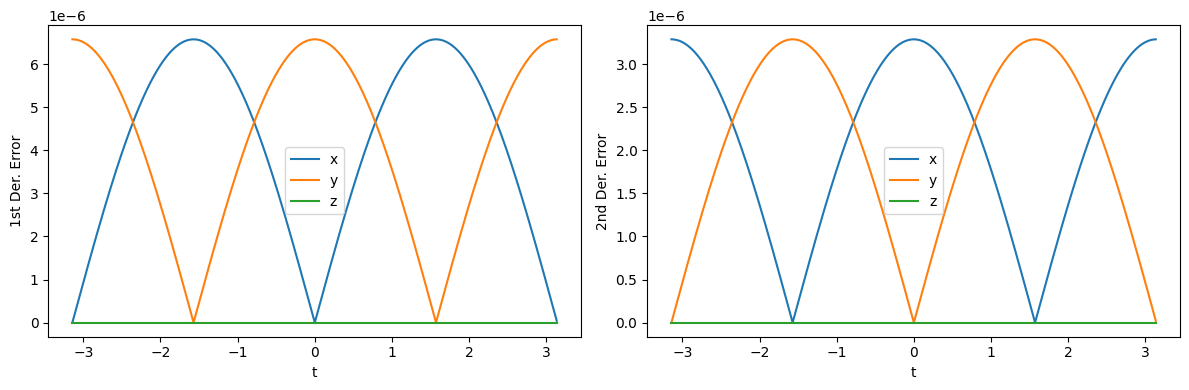

In [206]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Error 1st Der
axs[0].plot(t, np.abs(ds[0,:] - tds[0,:]))
axs[0].plot(t, np.abs(ds[1,:] - tds[1,:]))
axs[0].plot(t, np.abs(ds[2,:] - tds[2,:]))
axs[0].set_xlabel('t')
axs[0].legend(['x','y','z'])
axs[0].set_ylabel('1st Der. Error')

# Error 2nd Der
axs[1].plot(t, np.abs(d2s[0,:] - td2s[0,:]))
axs[1].plot(t, np.abs(d2s[1,:] - td2s[1,:]))
axs[1].plot(t, np.abs(d2s[2,:] - td2s[2,:]))
axs[1].set_xlabel('t')
axs[1].legend(['x','y','z'])
axs[1].set_ylabel('2nd Der. Error')


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()